In [3]:
import matplotlib.pyplot as plt
import torch
import pytorch_measure as pm
import numpy as np
N = 17 # number of weights
M = 1000 # Number of datapoints
verbose = True
dev = 'cpu'

x = torch.linspace(0, 10, M)
data = -2 + x + torch.randn(M).to(dev)

w = torch.ones(N,dtype=torch.float).to(dev)
w = torch.nn.parameter.Parameter(w/w.sum())
l = torch.linspace(-6, 2, N, requires_grad=False).to(dev)

def regression_model(a,x):
    return a+x

index = []
for i in range(M):
    ab = (regression_model(l, x[i]) - data[i]).abs()
    index.append(torch.argmin(ab))

def NLLLoss(m:list[pm.Measure]):
    return -m[0].weights[index].log().sum()

sd = (l[index] - data)**2
def WardLoss(w):
    return sum(sd * w[index])

def KDENLLLoss(w):

    def K(x):
        return torch.tensor(1/(np.sqrt(2*np.pi*h))*np.exp((-x**2/2).tolist()),requires_grad=True)


    sam=w[0].locations
    h=1.06*len(sam)**(-1/5)

    return -1/(len(sam))*torch.matmul(K((x.reshape(-1,1)-sam)/h),w[0].weights.reshape(-1,1).double()).log().sum()

Epoch: 0          Loss: 2641.5159  LR: 0.100000000
Epoch: 1          Loss: 2466.2214  LR: 0.100000000
Epoch: 2          Lr was reduced to: 0.070000000
Epoch: 3          Lr was reduced to: 0.049000000
Epoch: 4          Loss: 2365.6047  LR: 0.049000000
Epoch: 5          Lr was reduced to: 0.034300000
Epoch: 6          Loss: 2305.7793  LR: 0.034300000
Epoch: 7          Loss: 2252.3149  LR: 0.034300000
Epoch: 8          Lr was reduced to: 0.024010000
Epoch: 9          Lr was reduced to: 0.016807000
Epoch: 10         Lr was reduced to: 0.011764900
Epoch: 11         Lr was reduced to: 0.008235430
Epoch: 12         Loss: 2241.6987  LR: 0.008235430
Epoch: 13         Loss: 2231.2109  LR: 0.008235430
Epoch: 14         Loss: 2221.0466  LR: 0.008235430
Epoch: 15         Loss: 2211.9033  LR: 0.008235430
Epoch: 16         Loss: 2202.7908  LR: 0.008235430
Epoch: 17         Loss: 2194.4929  LR: 0.008235430
Epoch: 18         Loss: 2186.4160  LR: 0.008235430
Epoch: 19         Loss: 2179.2349  LR: 0.0082

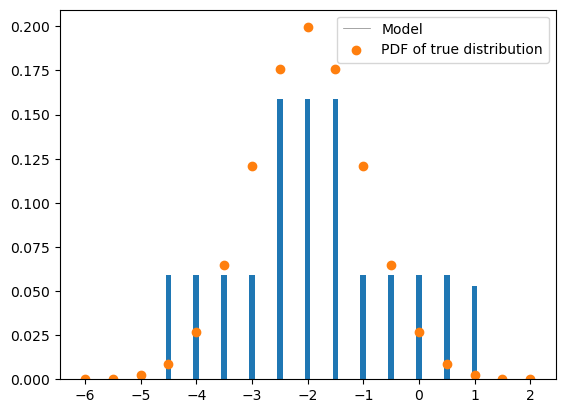

In [4]:
measure = pm.Measure(locations=l, weights=w, device=dev)
opt = pm.Optimizer([measure], lr=1e-1)
opt.minimize(NLLLoss, verbose=True, print_freq=1, max_epochs=1000, tol_const=1e-2)

plt.plot()

mu=0 #Create true values
sigma=1
xs = l.detach()
y=1/(np.sqrt(2*np.pi)*sigma)*torch.exp(-(xs+2-mu)**2/(2*sigma**2))
y/=sum(y) #Normalize


measure.visualize()
plt.scatter(xs, y, zorder=2)
plt.legend(['Model','PDF of true distribution'])
plt.show()
